In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Display settings
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 120)
plt.rcParams['figure.figsize'] = (10,6)
sns.set_style('whitegrid')


In [5]:
# Load
df = pd.read_csv("/Users/tanya-mac/Desktop/Health Risk Predictor from Lifestyle & Medical History/data/processed/model_dataset.csv")
print('Shape:', df.shape)
df.head()


Shape: (97297, 33)


,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk,hypertension_risk,heart_disease_risk,obesity_risk,cholesterol_imbalance
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,7.9,7.9,0,0,0,30.5,0.89,134,78,68,239,41,160,145,136,236,6.36,8.18,80,80,20,50,80
1,52,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,6.5,8.7,0,0,0,23.1,0.80,129,76,67,116,55,50,30,93,150,2.00,5.63,20,50,20,20,20
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,10.0,8.1,1,0,0,22.2,0.81,115,73,74,213,66,99,36,118,195,5.07,7.51,80,50,20,20,20
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,6.6,5.2,0,0,0,26.8,0.88,120,93,68,171,50,79,140,139,253,5.28,9.03,80,20,20,80,20
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,7.4,5.0,0,0,0,21.2,0.78,92,67,67,210,52,125,160,137,184,12.74,7.20,80,50,20,20,20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97297 entries, 0 to 97296
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 97297 non-null  int64  
 1   gender                              97297 non-null  object 
 2   ethnicity                           97297 non-null  object 
 3   education_level                     97297 non-null  object 
 4   income_level                        97297 non-null  object 
 5   employment_status                   97297 non-null  object 
 6   smoking_status                      97297 non-null  object 
 7   alcohol_consumption_per_week        97297 non-null  int64  
 8   physical_activity_minutes_per_week  97297 non-null  int64  
 9   diet_score                          97297 non-null  float64
 10  sleep_hours_per_day                 97297 non-null  float64
 11  screen_time_hours_per_day           97297

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,97297.0,NaN,NaN,NaN,50.192699,15.492557,19.0,38.0,51.0,61.0,90.0
gender,97297,3,Female,48873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnicity,97297,5,White,43798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,97297,4,Highschool,43651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income_level,97297,5,Middle,34214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_status,97297,4,Employed,58579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoking_status,97297,3,Never,58218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alcohol_consumption_per_week,97297.0,NaN,NaN,NaN,2.004543,1.41806,0.0,1.0,2.0,3.0,10.0
physical_activity_minutes_per_week,97297.0,NaN,NaN,NaN,118.942886,84.44192,0.0,57.0,100.0,160.0,833.0
diet_score,97297.0,NaN,NaN,NaN,5.995214,1.780096,0.0,4.8,6.0,7.2,10.0


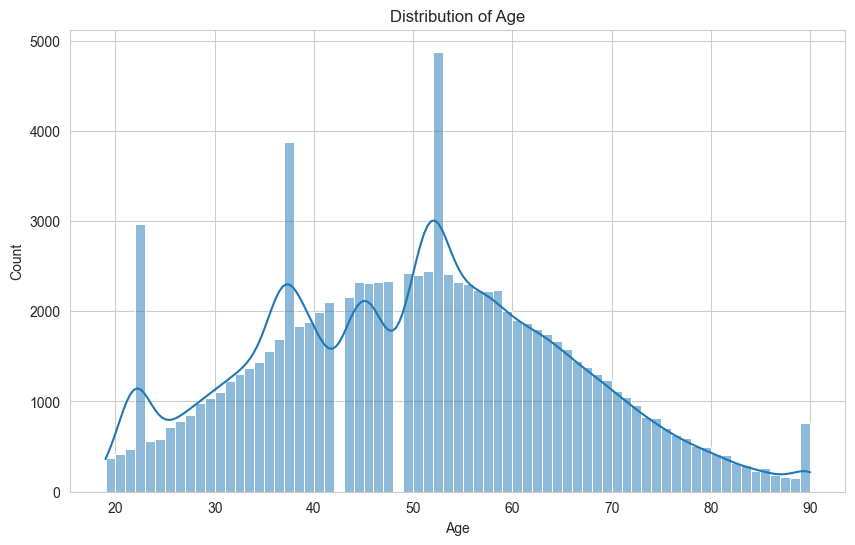

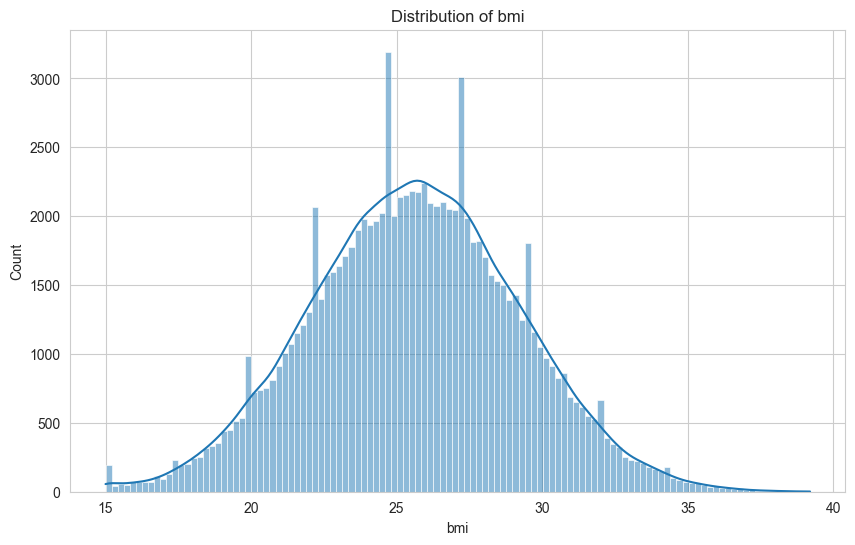

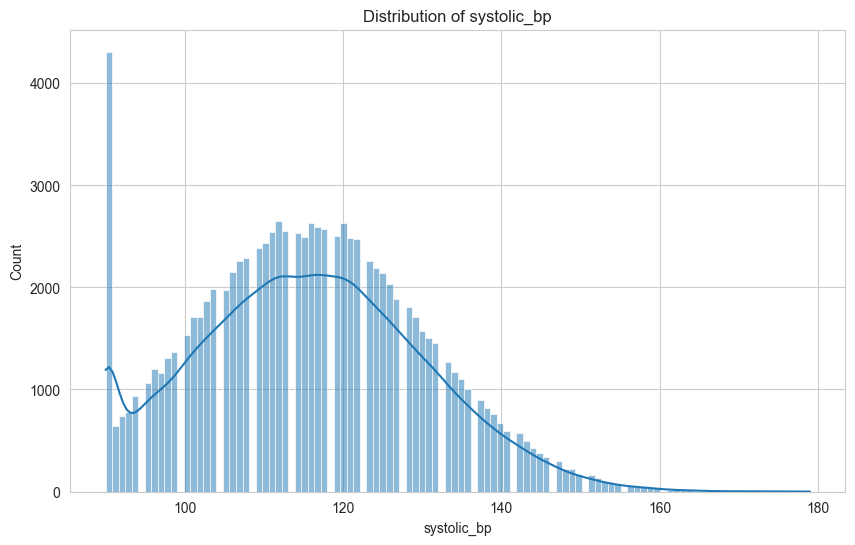

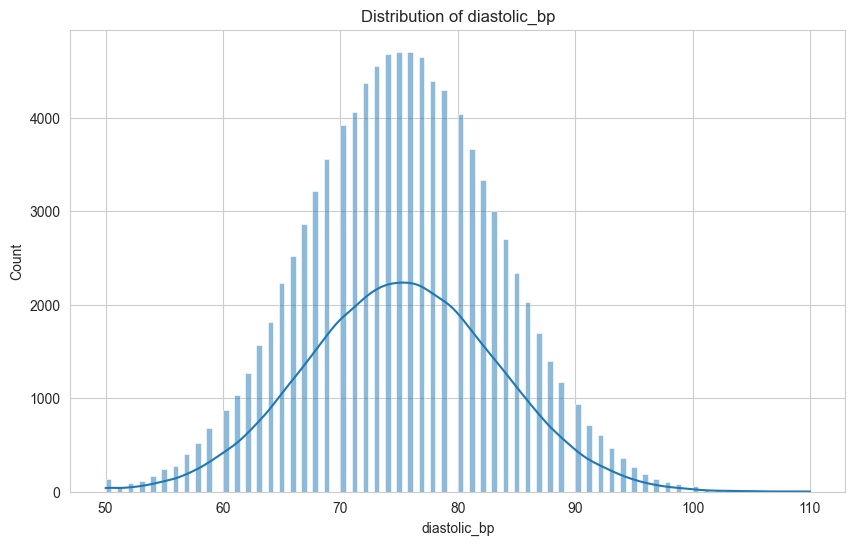

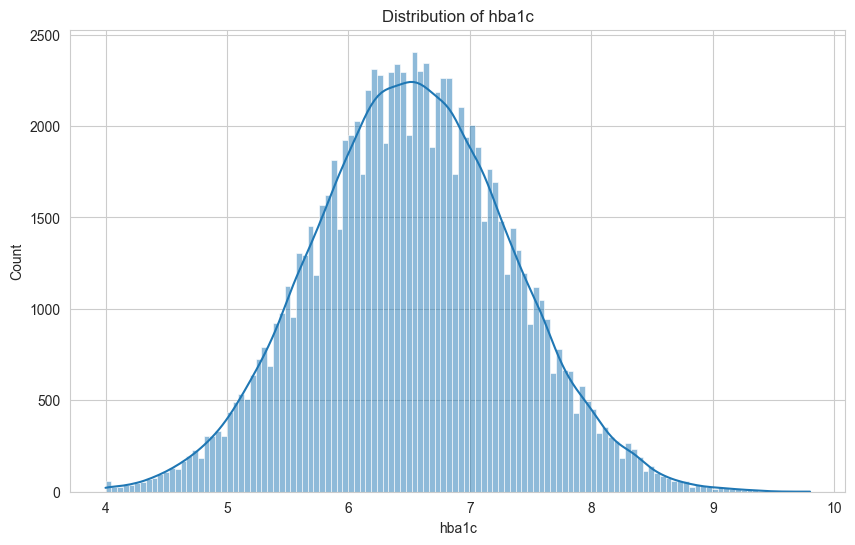

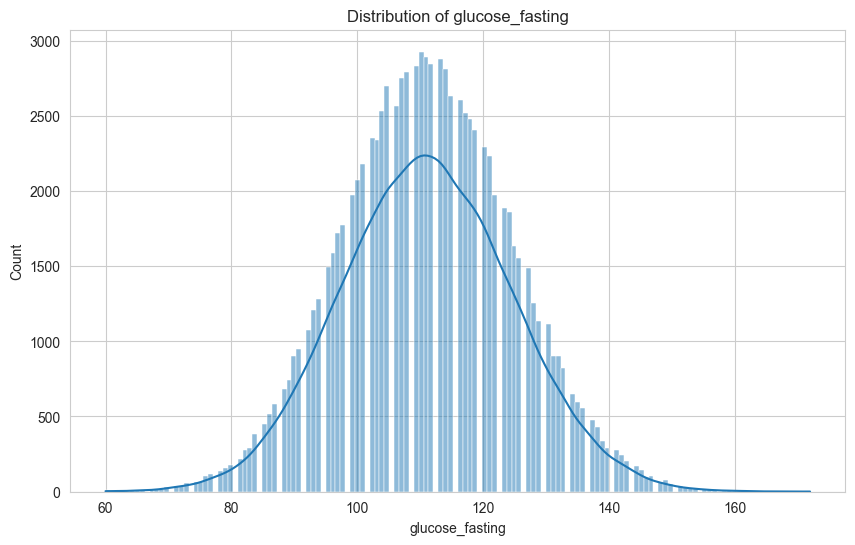

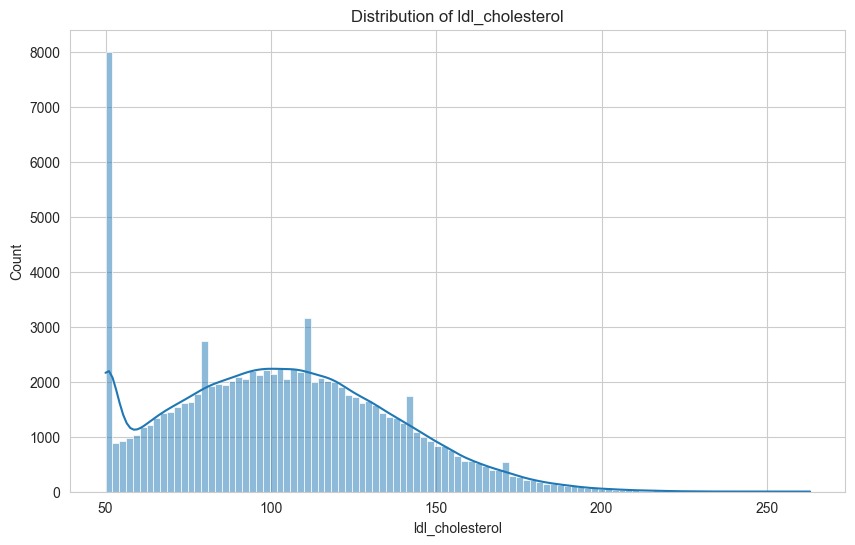

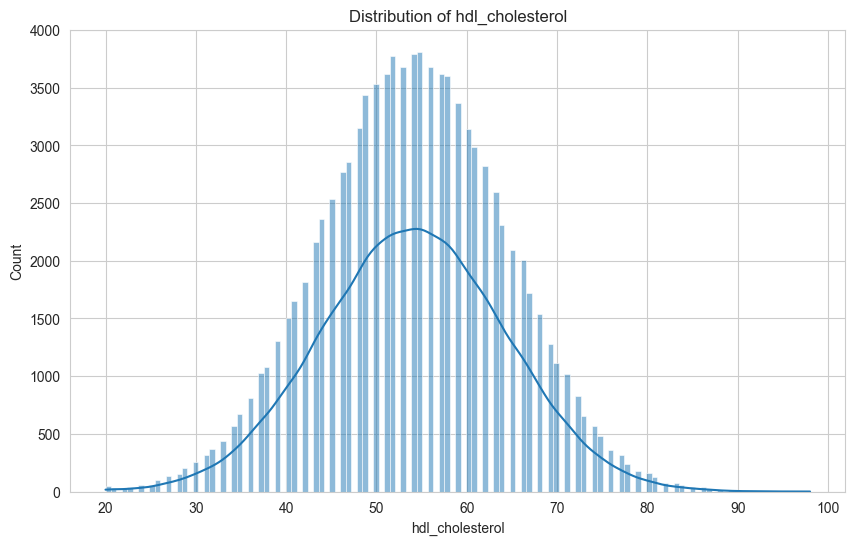

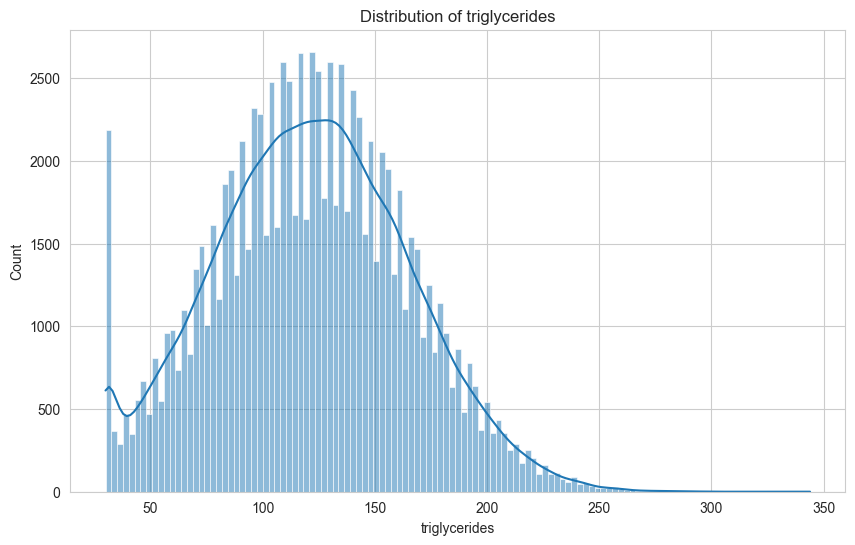

In [8]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
# drop id-like or many-target columns if desired
exclude = ['diabetes_risk_score_final','heart_disease_score','cholesterol_risk_score']
plot_cols = [c for c in num_cols if c not in exclude]

# Plot histograms for selected important numeric columns
important = ['Age','bmi','systolic_bp','diastolic_bp','hba1c','glucose_fasting','ldl_cholesterol','hdl_cholesterol','triglycerides']
important = [c for c in important if c in df.columns]
for c in important:
    plt.figure()
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(f'Distribution of {c}')
    plt.show()


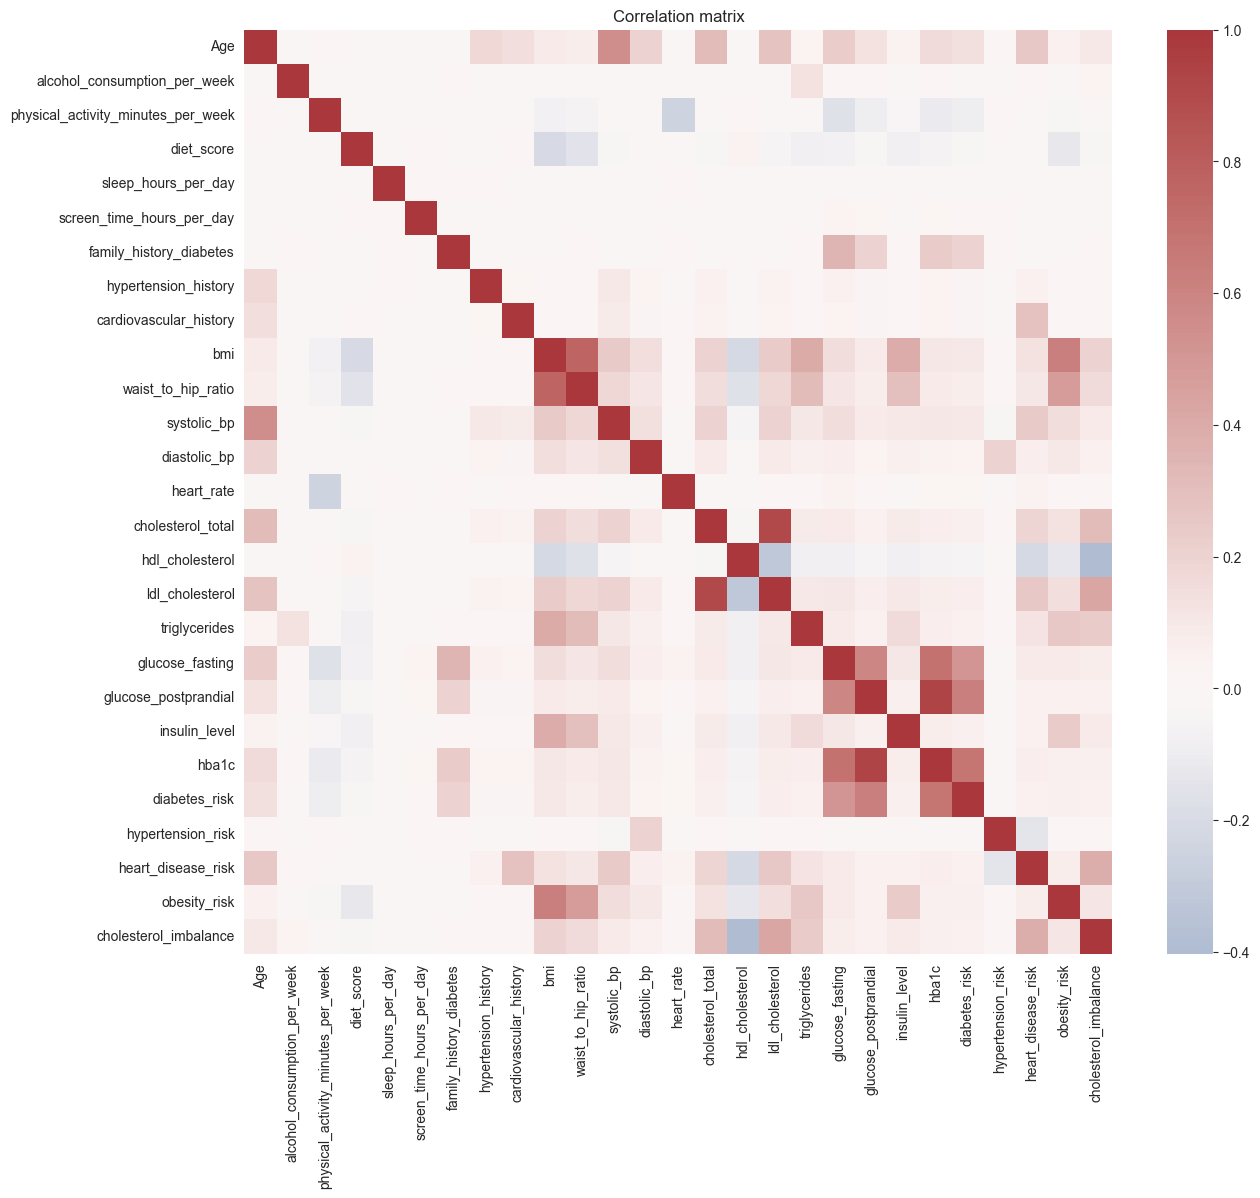


Top correlations with diabetes_risk


diabetes_risk                         1.000000
hba1c                                 0.678679
glucose_postprandial                  0.628906
glucose_fasting                       0.510645
family_history_diabetes               0.198945
Age                                   0.138098
physical_activity_minutes_per_week    0.100005
bmi                                   0.097200
systolic_bp                           0.096545
waist_to_hip_ratio                    0.078669
ldl_cholesterol                       0.068381
obesity_risk                          0.059703
cholesterol_total                     0.059077
insulin_level                         0.057885
triglycerides                         0.057132
Name: diabetes_risk, dtype: float64


Top correlations with hypertension_risk


hypertension_risk                     1.000000
diastolic_bp                          0.196867
heart_disease_risk                    0.140857
systolic_bp                           0.039832
obesity_risk                          0.013588
bmi                                   0.011843
waist_to_hip_ratio                    0.007230
hdl_cholesterol                       0.005797
family_history_diabetes               0.005576
physical_activity_minutes_per_week    0.004969
triglycerides                         0.004868
cholesterol_imbalance                 0.004522
cholesterol_total                     0.004041
ldl_cholesterol                       0.003772
Age                                   0.003651
Name: hypertension_risk, dtype: float64


Top correlations with heart_disease_risk


heart_disease_risk        1.000000
cholesterol_imbalance     0.386340
cardiovascular_history    0.285186
Age                       0.250559
ldl_cholesterol           0.250495
systolic_bp               0.246961
hdl_cholesterol           0.214288
cholesterol_total         0.189628
hypertension_risk         0.140857
bmi                       0.130096
triglycerides             0.121175
waist_to_hip_ratio        0.101807
glucose_fasting           0.087613
obesity_risk              0.068743
diastolic_bp              0.067184
Name: heart_disease_risk, dtype: float64


Top correlations with obesity_risk


obesity_risk             1.000000
bmi                      0.629720
waist_to_hip_ratio       0.480659
triglycerides            0.254484
insulin_level            0.241546
systolic_bp              0.152544
ldl_cholesterol          0.149132
hdl_cholesterol          0.135896
diet_score               0.125078
cholesterol_total        0.124076
cholesterol_imbalance    0.112914
diastolic_bp             0.096715
glucose_fasting          0.090397
heart_disease_risk       0.068743
hba1c                    0.062412
Name: obesity_risk, dtype: float64


Top correlations with cholesterol_imbalance


cholesterol_imbalance    1.000000
ldl_cholesterol          0.421937
hdl_cholesterol          0.402484
heart_disease_risk       0.386340
cholesterol_total        0.311055
triglycerides            0.243627
bmi                      0.210575
waist_to_hip_ratio       0.161814
obesity_risk             0.112914
Age                      0.099768
systolic_bp              0.095691
insulin_level            0.086118
glucose_fasting          0.075912
hba1c                    0.058127
diastolic_bp             0.050897
Name: cholesterol_imbalance, dtype: float64

In [11]:
# Correlation among numeric features and targets
num_for_corr = [c for c in num_cols if df[c].nunique()>1]
selected = num_for_corr.copy()
for t in targets:
    if t in df.columns and t not in selected:
        selected.append(t)

corr = df[selected].corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, cmap='vlag', center=0, fmt='.2f')
plt.title('Correlation matrix')
plt.show()

# Show top correlations for each target
for t in targets:
    if t in corr.columns:
        print('\nTop correlations with', t)
        display(corr[t].abs().sort_values(ascending=False).head(15))
